# Lab 2
## Step 1
open the seqs1.fa file and aligned the data in the file using muscle. The output is now called seqs1.aligned.fa. Then we converted the information to newick tree (plotted below).

In [33]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

tree = Phylo.read("tree.nwk","newick")
Phylo.draw_ascii(tree, file=None, column_width = 120)
a = tree.find_clades(order='preorder')

 , hu.39
 |
 | rh.50
 |
 |_ rh.57
 |
 | rh.51
 |
 | rh.49
 |
_, rh.53
 |
 | rh.64
 |
 , rh.61
 |
 | __ rh.58
 ||
 ||                                                  , pi.2
 ||                 _________________________________|
 ||                |                                 , pi.3
 ||                |                                 |
 ||                |                                 | pi.1
 ||                |
 ||                |                  , rh.10
 ||             ___|                 _|
 ||            |   |                | |, bb.1
 ||            |   |                | ||
 ||            |   |    ____________|  | bb.2
 ||            |   |   |            |
 ||            |   |   |            | ___ hu.17
 ||            |   |   |            ||
 ||            |   |___|             | hu.6
 ||            |       |
 ||            |       |      ___________ rh.2
 ||            |       |     |
 ||            |       |_____|               _____ rh.40
 ||            |            

## Step 2
Here we take the information in seqs1.fa and print the sequence of each chosen specimen to screen. For this part, we tested pi.1, pi.2, rh.10, hu.6, rh.2, hu.42, cy.4, cy.6, rh.55, rh.43, rh.52. The most common species matches for chosen clusters are Adeno-associated VP1 (cap gene) virus. There are some outliers with cy.4 and 6 being the Adeno-associated virus in non-human primates. The data matches the same gene for most of the clusters however, some of the clusters are the same gene but in different species. We might not trust the annotations for sequences that come up in BLAST because the results that come in may not be from trusted sources and we don't know the quality of the sequencing reads.

In [34]:
record = SeqIO.index("seqs.fa", "fasta")
print(record.get_raw("pi.1").decode())
print(record.get_raw("pi.2").decode())
print(record.get_raw("rh.10").decode())
print(record.get_raw("hu.6").decode())
print(record.get_raw("rh.2").decode())
print(record.get_raw("hu.42").decode())
print(record.get_raw("cy.4").decode())
print(record.get_raw("cy.6").decode())
print(record.get_raw("rh.55").decode())
print(record.get_raw("rh.43").decode())
print(record.get_raw("rh.52").decode())


>pi.1
atggctgctgacggttatcttccagattggctcgaggacaacctctctga
gggcattcgcgagtggtgggcgctgaaacctggagccccgcaacccaaag
ccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctac
aagtacctcggacccttcaacggactcgacaagggggagcccgtcaacga
ggcggacgccgcggccctcgagcacgacaaggcctacgaccagcagctca
aagcgggtgacaatccgtacctgcggtataatcacgccgacgccgagttt
caagagcgtctgcaagaagatacgtcctttgggggcaacctcgggcgagc
agtcttccaggccaaaaagagggtactcgagcctctgggtctggttgagg
aaggcgctaagacggctcctggaaagaagcggccagtagaaccggactcc
agctcgggcatcggcaagtcaggccagcagcccgcgaaaaagagactgaa
ttttgggcagactggcgactcagagtcagtgcctgacccccaacctctct
cagaaccacccgcaggtccctctggtctgggatctggtacaatggctgct
ggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtggg
taatgtctcaggaaattggcattgcgattccacatggctgggcgaccgag
tcatcaccaccagcactcggacctgggccctccccacctacaacaaccac
ctctacaagcaaatctccaacgggacctcgggaggcagcagcaacgacaa
cacctactttggctacagcaccccctgggggtattttgactttaacagat
tccactgccacttttcaccacgtgactggcagcgactcatcaacaacaac
tgggggttccggcccaagaagctcaacttcaagctcttcaacatccaggt
caaggaggtcacccagaatgaaggc

## Step 3

Here we create clusters based of the newick tree above. Using those clusters, we align the sequences using MSA and calculate the percentages of AT and GC content in each cluster. We also create boxplots to compare the length of the sequences in each cluster.


In [35]:
from Bio import SeqIO
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
list_seqrecord1 = []
list_seqrecord2 = []
list_seqrecord3 = []
list_seqrecord4 = []
list_seqrecord5 = []
list_seqrecord6 = []
list_seqrecord7 = []
clust1 = ["hu.39","rh.50","rh.57","rh.51","rh.49", "rh.53","rh.64", "rh.61"]
clust2 = ["pi.2", "pi.3","pi.1"]
clust3 = ["rh.10", "bb.1","bb.2", "hu.17","hu.6", "rh.2"]
clust4 = ["rh.40", "hu.67", "hu.37", "hu.40", "hu.66", "hu.41", "rh.38", "hu.42"]
clust5 = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13"]
clust6 = ["rh.35", "rh.36", "rh.37", "cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "hu.43", "hu.48"]
clust7 = ["hu.44", "hu.46", "hu.14", "hu.31", "hu.32", "rh.43", "rh.52"]    
#Putting the seqRecord objects corresponding to the clusters into a list
for i in clust1:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord1.append(seq_rec)
for i in clust2:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord2.append(seq_rec)
for i in clust3:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord3.append(seq_rec)
for i in clust4:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord4.append(seq_rec)
for i in clust5:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord5.append(seq_rec)
for i in clust6:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord6.append(seq_rec)
for i in clust7:
    for seq_rec in (SeqIO.parse("seqs.aligned.fa", "fasta")):
        if seq_rec.name == i:
            list_seqrecord7.append(seq_rec)
#Multiple Sequence Alignments created for each cluster
align1 = MultipleSeqAlignment([list_seqrecord1[0], list_seqrecord1[1], list_seqrecord1[2], list_seqrecord1[3],
                              list_seqrecord1[4],list_seqrecord1[5],list_seqrecord1[6],list_seqrecord1[7]])
align2 = MultipleSeqAlignment([list_seqrecord2[0], list_seqrecord2[1], list_seqrecord2[2]])
align3 = MultipleSeqAlignment([list_seqrecord3[0], list_seqrecord3[1], list_seqrecord3[2], list_seqrecord3[3],
                              list_seqrecord3[4],list_seqrecord3[5]])
align4 = MultipleSeqAlignment([list_seqrecord4[0], list_seqrecord4[1], list_seqrecord4[2], list_seqrecord4[3],
                              list_seqrecord4[4],list_seqrecord4[5],list_seqrecord4[6],list_seqrecord4[7]])
align5 = MultipleSeqAlignment([list_seqrecord5[0], list_seqrecord5[1], list_seqrecord5[2], list_seqrecord5[3],
                              list_seqrecord5[4]])
align6 = MultipleSeqAlignment([list_seqrecord6[0], list_seqrecord6[1], list_seqrecord6[2], list_seqrecord6[3],
                              list_seqrecord6[4],list_seqrecord6[5],list_seqrecord6[6],list_seqrecord6[7],
                              list_seqrecord6[8], list_seqrecord6[9]])
align7 = MultipleSeqAlignment([list_seqrecord7[0], list_seqrecord7[1], list_seqrecord7[2], list_seqrecord7[3],
                               list_seqrecord7[4],list_seqrecord7[5],list_seqrecord7[6]])

In [36]:
#Making bargraphs, based on BLAST alignment can assume that other clusters will look the same.
clust1max = align1.get_alignment_length()
clust2max = align2.get_alignment_length()
clust3max = align3.get_alignment_length()
clust4max = align4.get_alignment_length()
clust5max = align5.get_alignment_length()
clust6max = align6.get_alignment_length()
clust7max = align7.get_alignment_length()

In [37]:
# Define the calculate percentage function for ATCG at each position
def calculateATCGpercent(align, clustMax):
    atNumList = []
    gcNumList = []
    for i in range(clustMax):
        position = []
        for seq_rec in align:
            position.append(seq_rec[i])
            atNum = (position.count("A") + position.count("T"))
            gcNum = (position.count("C") + position.count("G"))
        atNumList.append(atNum)
        gcNumList.append(gcNum)
    alLength = len(align)
    atPctList = []
    gcPctList = []
    for num in atNumList:
        atPctList.append(num/alLength)
    for num in gcNumList:
        gcPctList.append(num/alLength)
    return atPctList, gcPctList
#Cluster1   
atPctList1, gcPctList1 = calculateATCGpercent(align1, clust1max)
#Cluster2
atPctList2, gcPctList2 = calculateATCGpercent(align2, clust2max)
#Cluster3
atPctList3, gcPctList3 = calculateATCGpercent(align3, clust3max)
#Cluster4
atPctList4, gcPctList4 = calculateATCGpercent(align4, clust4max)
#Cluster5
atPctList5, gcPctList5 = calculateATCGpercent(align5, clust5max)
#Cluster6
atPctList6, gcPctList6 = calculateATCGpercent(align6, clust6max)
#Cluster7
atPctList7, gcPctList7 = calculateATCGpercent(align7, clust7max)

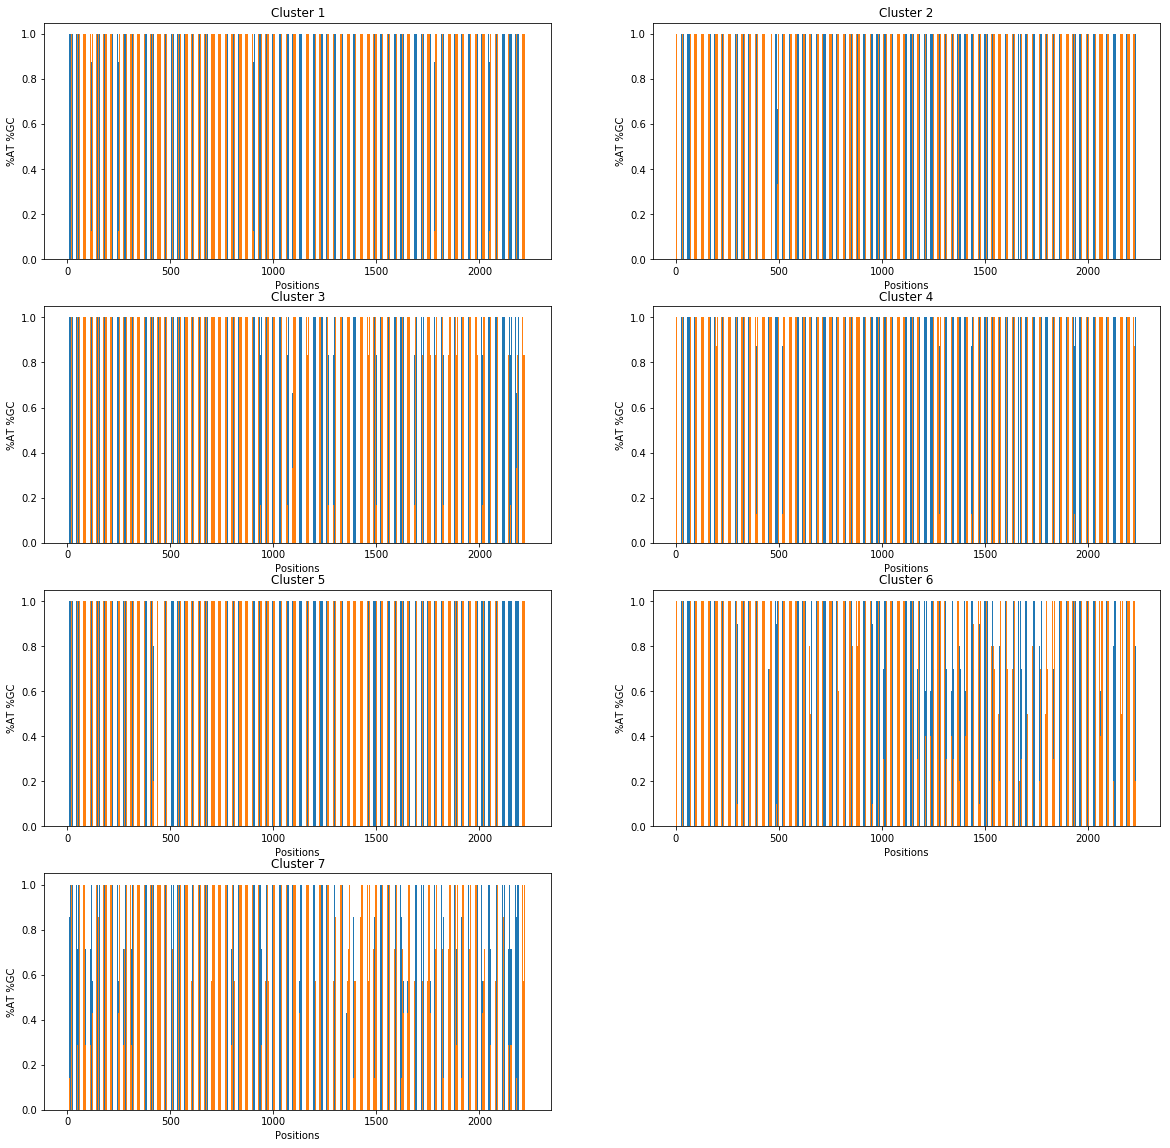

In [38]:
def plotATCG(atPctList, gcPctList, seqNum):
    p1 = plt.bar(range(len(atPctList)), atPctList, 0.5)
    p2 = plt.bar(range(len(gcPctList)), gcPctList, 0.5)
    plt.ylabel("%AT %GC")
    plt.xlabel("Positions")
    plotTitle = "Cluster " + str(seqNum)
    plt.title(plotTitle)

plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams['savefig.dpi'] = 300 
plt.subplot(421)
plotATCG(atPctList1, gcPctList1, 1)
plt.subplot(422)
plotATCG(atPctList2, gcPctList2, 2)
plt.subplot(423)
plotATCG(atPctList3, gcPctList3, 3)
plt.subplot(424)
plotATCG(atPctList4, gcPctList4, 4)
plt.subplot(425)
plotATCG(atPctList5, gcPctList5, 5)
plt.subplot(426)
plotATCG(atPctList6, gcPctList6, 6)
plt.subplot(427)
plotATCG(atPctList7, gcPctList7, 7)

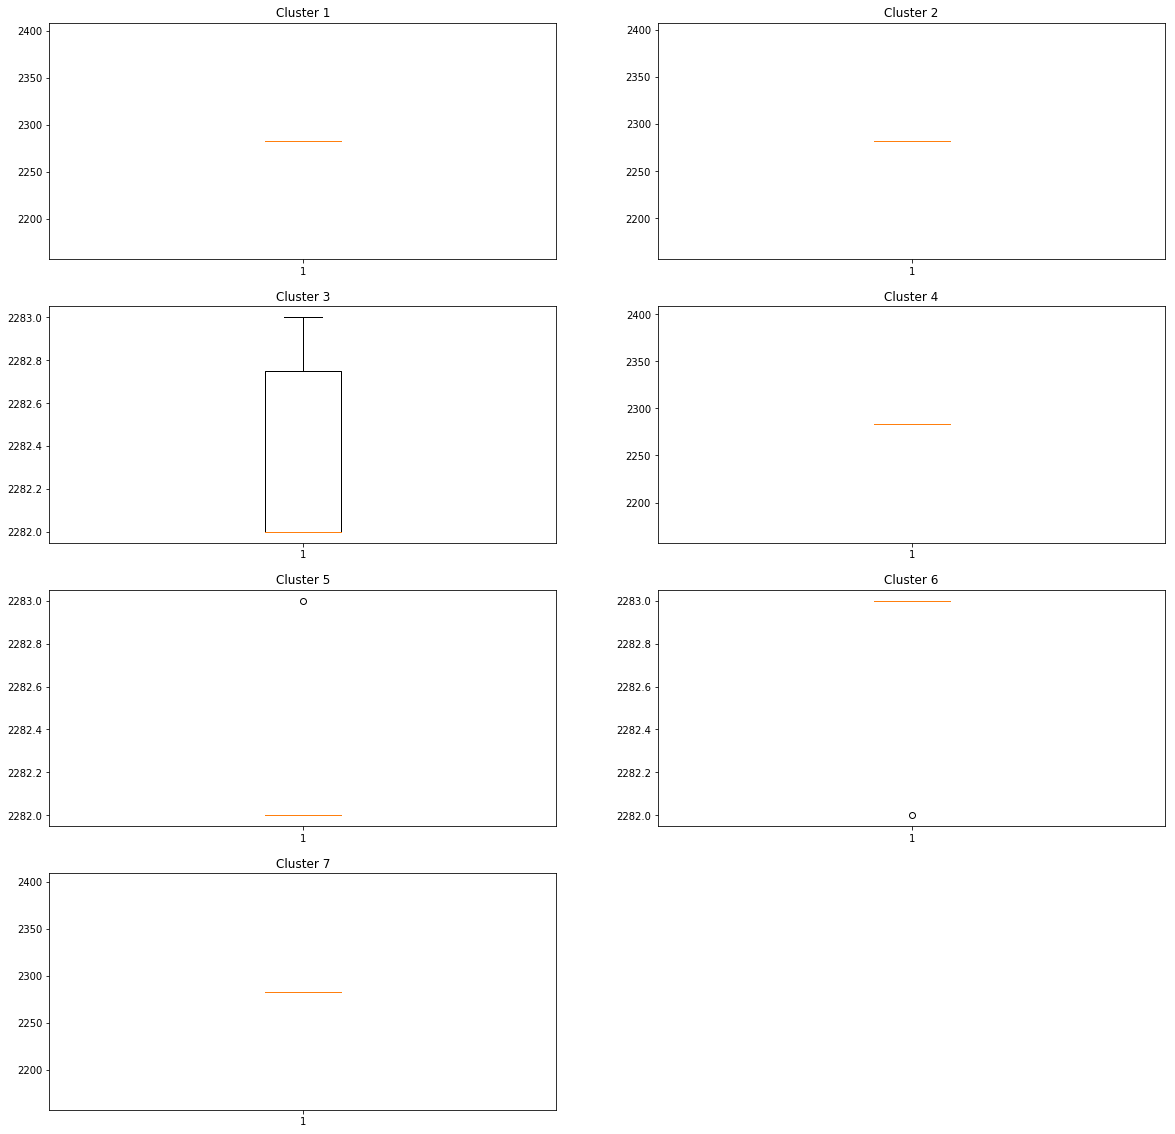

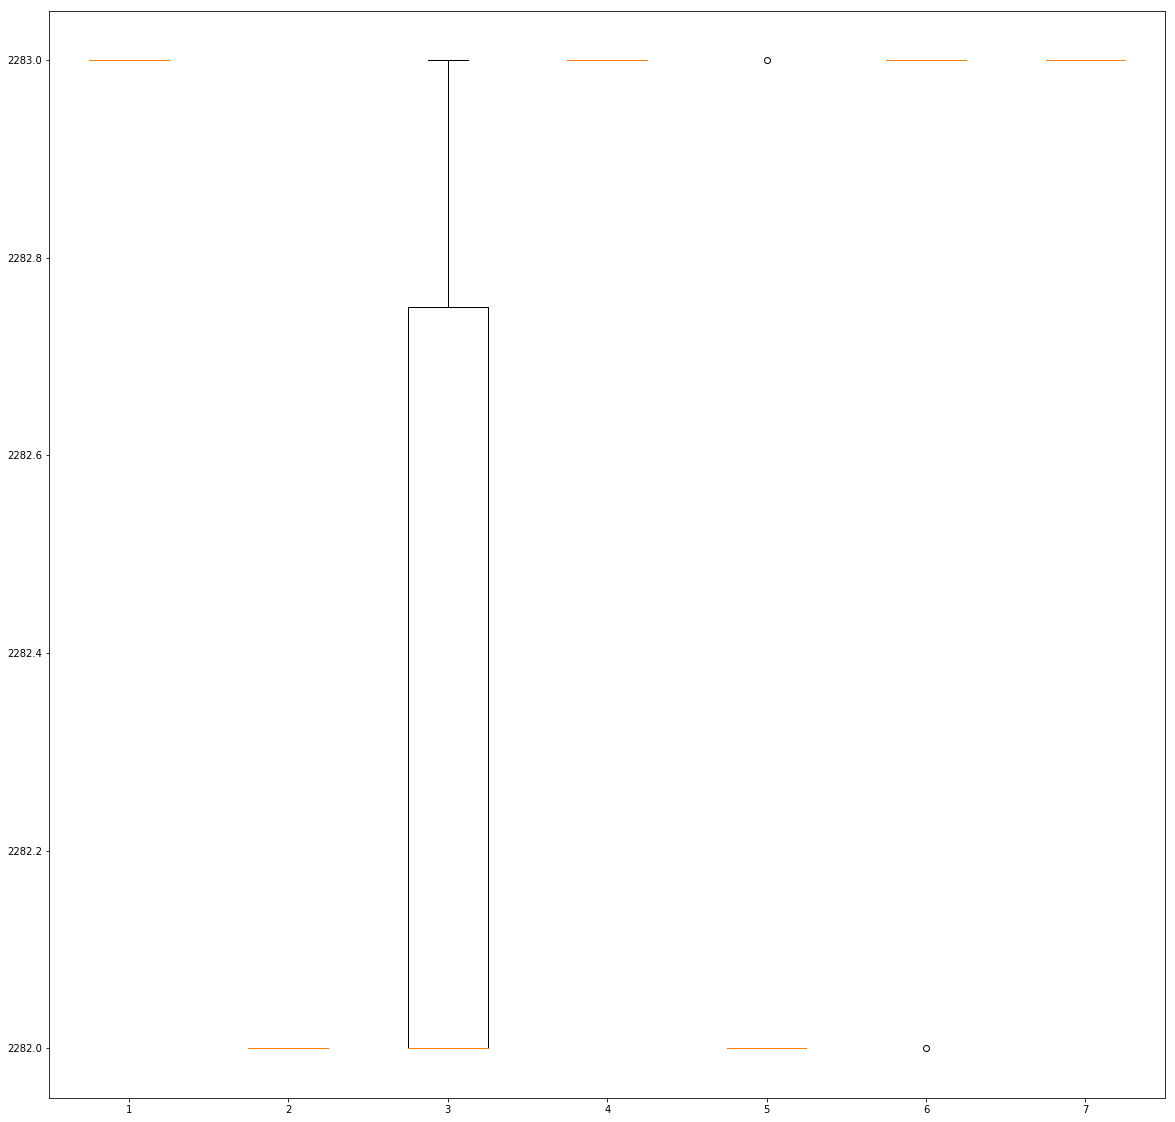

In [46]:
#Making a boxplot for the lengths of sequences in each cluster, again all are same length
record = SeqIO.index("seqs.aligned.fa", "fasta")
#Cluster1
lenList1 = []
for plc in clust1:
    lenList1.append(len(record.get_raw(plc).decode()))
#Cluster2
lenList2 = []
for plc in clust2:
    lenList2.append(len(record.get_raw(plc).decode()))
#Cluster3
lenList3 = []
for plc in clust3:
    lenList3.append(len(record.get_raw(plc).decode()))
#Cluster4
lenList4 = []
for plc in clust4:
    lenList4.append(len(record.get_raw(plc).decode()))
#Cluster5
lenList5 = []
for plc in clust5:
    lenList5.append(len(record.get_raw(plc).decode()))
#Cluster6
lenList6 = []
for plc in clust6:
    lenList6.append(len(record.get_raw(plc).decode()))
#Cluster7
lenList7 = []
for plc in clust1:
    lenList7.append(len(record.get_raw(plc).decode()))

plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams['savefig.dpi'] = 300 
plt.subplot(421)
plt.title("Cluster 1")
plt.boxplot(lenList1)
plt.subplot(422)
plt.title("Cluster 2")
plt.boxplot(lenList2)
plt.subplot(423)
plt.title("Cluster 3")
plt.boxplot(lenList3)
plt.subplot(424)
plt.title("Cluster 4")
plt.boxplot(lenList4)
plt.subplot(425)
plt.title("Cluster 5")
plt.boxplot(lenList5)
plt.subplot(426)
plt.title("Cluster 6")
plt.boxplot(lenList6)
plt.subplot(427)
plt.title("Cluster 7")
plt.boxplot(lenList7)
# Multiple box plots on one Axes
data = [lenList1, lenList2, lenList3, lenList4, lenList5, lenList6, lenList7]
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

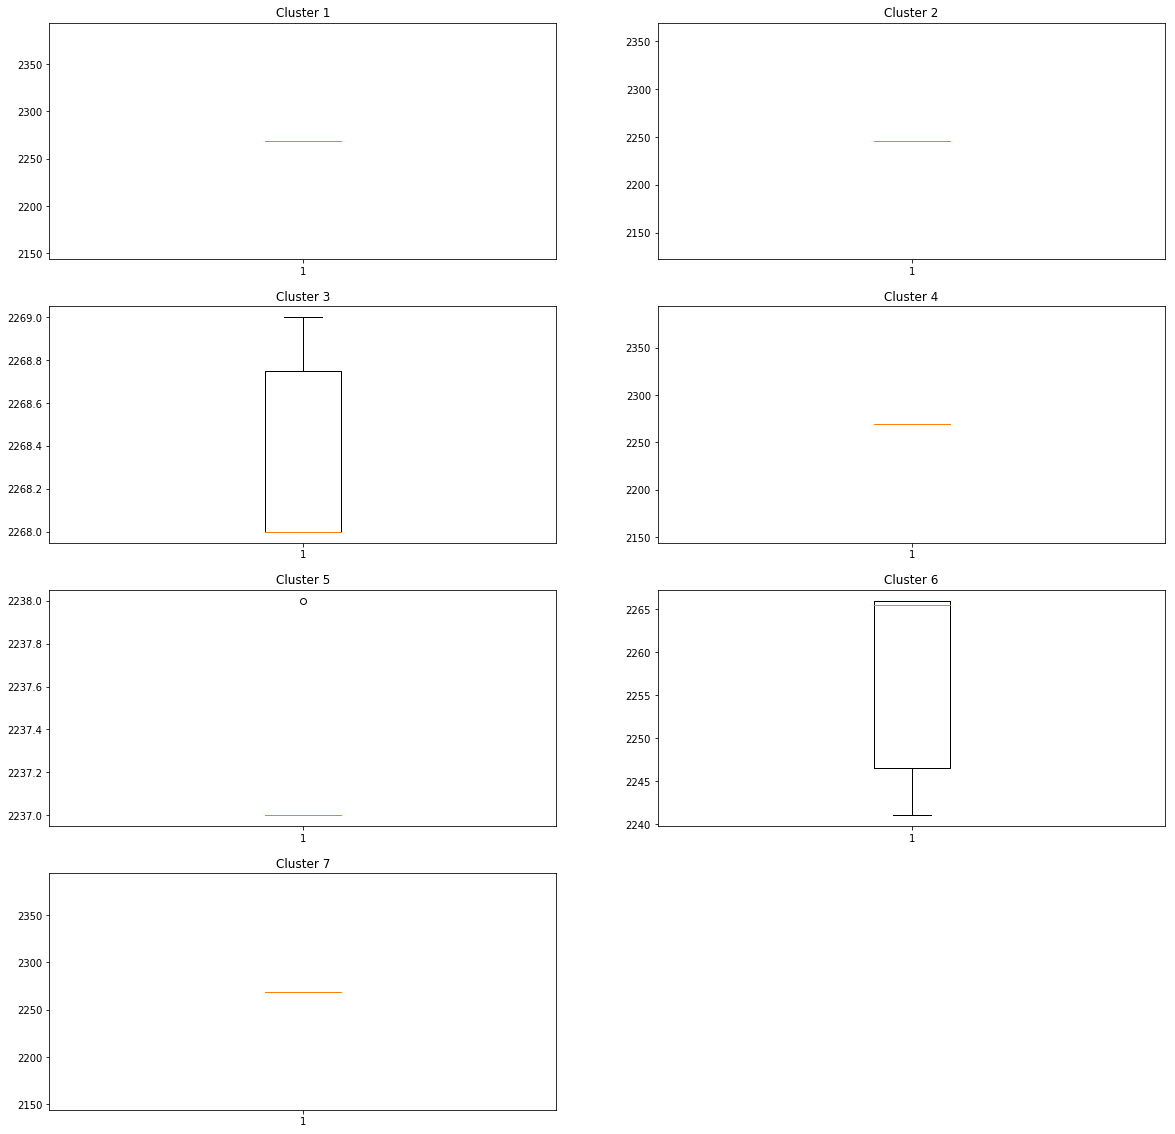

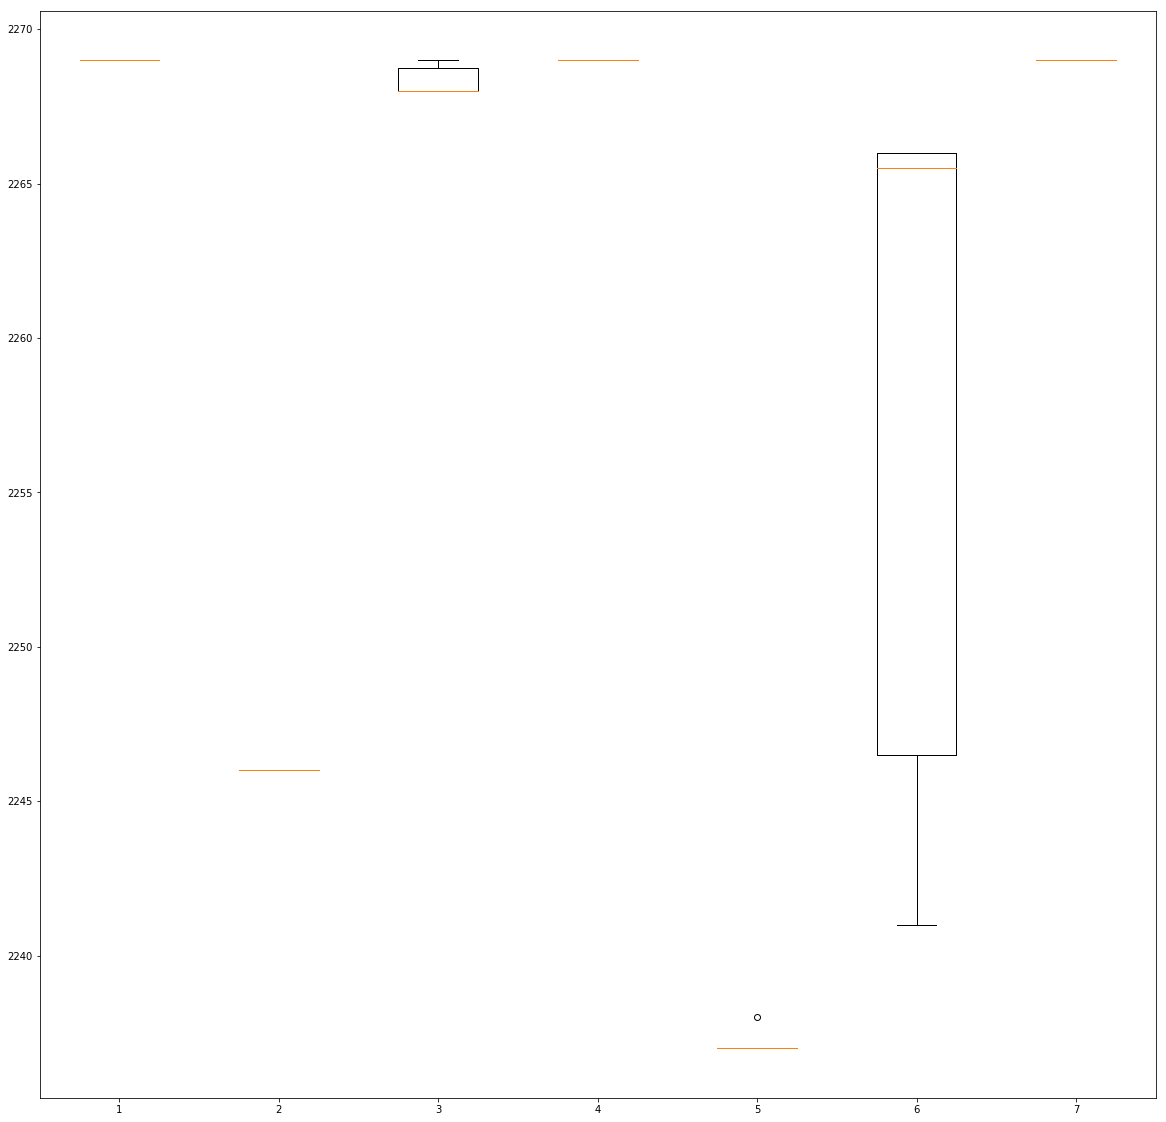

In [47]:
#Making a boxplot for the lengths of original sequences in each cluster
record = SeqIO.index("seqs.fa", "fasta")
#Cluster1
lenList1 = []
for plc in clust1:
    lenList1.append(len(record.get_raw(plc).decode()))
#Cluster2
lenList2 = []
for plc in clust2:
    lenList2.append(len(record.get_raw(plc).decode()))
#Cluster3
lenList3 = []
for plc in clust3:
    lenList3.append(len(record.get_raw(plc).decode()))
#Cluster4
lenList4 = []
for plc in clust4:
    lenList4.append(len(record.get_raw(plc).decode()))
#Cluster5
lenList5 = []
for plc in clust5:
    lenList5.append(len(record.get_raw(plc).decode()))
#Cluster6
lenList6 = []
for plc in clust6:
    lenList6.append(len(record.get_raw(plc).decode()))
#Cluster7
lenList7 = []
for plc in clust1:
    lenList7.append(len(record.get_raw(plc).decode()))

plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams['savefig.dpi'] = 300 
plt.subplot(421)
plt.title("Cluster 1")
plt.boxplot(lenList1)
plt.subplot(422)
plt.title("Cluster 2")
plt.boxplot(lenList2)
plt.subplot(423)
plt.title("Cluster 3")
plt.boxplot(lenList3)
plt.subplot(424)
plt.title("Cluster 4")
plt.boxplot(lenList4)
plt.subplot(425)
plt.title("Cluster 5")
plt.boxplot(lenList5)
plt.subplot(426)
plt.title("Cluster 6")
plt.boxplot(lenList6)
plt.subplot(427)
plt.title("Cluster 7")
plt.boxplot(lenList7)
# Multiple box plots on one Axes
data = [lenList1, lenList2, lenList3, lenList4, lenList5, lenList6, lenList7]
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()